# Insurance Claims Case Study

#### Questions to be answered:

1. Import claims_data.csv and cust_data.csv which is provided to you and 
   combine the two datasets appropriately to create a 360-degree view of 
   the data. Use the same for the subsequent questions.
2. Perform a data audit for the datatypes and find out if there are any 
   mismatch within the current datatypes of the columns and their 
   business significance.
3. Convert the column claim_amount to numeric. Use the appropriate 
   modules/attributes to remove the dollar sign.
4. Of all the injury claims, some of them have gone unreported with the 
   police. Create an alert flag (1,0) for all such claims.
5. One customer can claim for insurance more than once and in each claim,
   multiple categories of claims can be involved. However, customer ID 
   should remain unique. 
   Retain the most recent observation and delete any duplicated records in
   the data based on the customer ID column.
6. Check for missing values and impute the missing values with an 
   appropriate value. (mean for continuous and mode for categorical)
7. Calculate the age of customers in years. Based on the age, categorize the
   customers according to the below criteria
    - Children < 18
    - Youth 18-30
    - Adult 30-60
    - Senior > 60
8. What is the average amount claimed by the customers from various 
   segments?
9. What is the total claim amount based on incident cause for all the claims
   that have been done at least 20 days prior to 1st of October, 2018.
10. How many adults from TX, DE and AK claimed insurance for driver 
    related issues and causes? 
11. Draw a pie chart between the aggregated value of claim amount based 
    on gender and segment. Represent the claim amount as a percentage on
    the pie chart.
12. Among males and females, which gender had claimed the most for any 
    type of driver related issues? E.g. This metric can be compared using a 
    bar chart
13. Which age group had the maximum fraudulent policy claims? Visualize 
    it on a bar chart.
14. Visualize the monthly trend of the total amount that has been claimed 
    by the customers. Ensure that on the “month” axis, the month is in a 
    chronological order not alphabetical order. 
15. What is the average claim amount for gender and age categories and 
    suitably represent the above using a facetted bar chart, one facet that 
    represents fraudulent claims and the other for non-fraudulent claims.

- Based on the conclusions from exploratory analysis as well as suitable 
  statistical tests, answer the below questions. Please include a detailed 
  write-up on the parameters taken into consideration, the Hypothesis 
  testing steps, conclusion from the p-values and the business implications of 
  the statements. 
16. Is there any similarity in the amount claimed by males and females?
17. Is there any relationship between age category and segment?
18. The current year has shown a significant rise in claim amounts as 
    compared to 2016-17 fiscal average which was 10,000.
19. Is there any difference between age groups and insurance claims?
20. Is there any relationship between total number of policy claims and the 
    claimed amount?


#### Given Data:

1. Insurance claims - (Claims.csv)
2. Customer Demographics - (Cust_Demographics.csv)

#### Utilising the given data the following report is made to answer business questions

##### Importing necessary packages for the report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [2]:
file_path = 'E:/zoho/AnalytixLabs Notes - downloads/Case Studies/Python Case Study 3 Insurance Study/'

##### Getting Information:

In [3]:
claims = pd.read_csv(file_path + 'claims.csv', delimiter = ',')
cust_dgh = pd.read_csv(file_path + 'cust_demographics.csv', delimiter = ',')

In [4]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [5]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [6]:
cust_dgh

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [7]:
cust_dgh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


##### Data Preparation:

In [8]:
cust_dgh.DateOfBirth = pd.to_datetime(cust_dgh.DateOfBirth, format = '%d-%b-%y')
cust_dgh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CUST_ID      1085 non-null   int64         
 1   gender       1085 non-null   object        
 2   DateOfBirth  1085 non-null   datetime64[ns]
 3   State        1085 non-null   object        
 4   Contact      1085 non-null   object        
 5   Segment      1085 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 51.0+ KB


In [9]:
cust_dgh['DateOfBirth'] = cust_dgh['DateOfBirth'].apply(lambda x : x + pd.DateOffset(years = -100) if x.year > 2059 else x)
cust_dgh.DateOfBirth.dt.year.unique()

array([1979, 1970, 1984, 1986, 1977, 1999, 1993, 1966, 1985, 1990, 1963,
       1969, 1987, 1965, 1967, 1974, 1980, 1981, 1995, 1996, 1962, 1994,
       1968, 1971, 1988, 1989, 1976, 1975, 1964, 1998, 1960, 1961, 1972,
       1992, 1997, 1973, 1982, 1978, 1991, 1983], dtype=int64)

In [10]:
claims.claim_date = pd.to_datetime(claims.claim_date, format = '%m/%d/%Y')
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   object        
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 86.1+ KB


In [11]:
# Q1) Combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

insu_df = cust_dgh.merge(claims, how = 'outer', left_on = 'CUST_ID', right_on = 'customer_id')
insu_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,35951012.0,Other driver error,2017-06-11,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,$25120,1.0,No


In [12]:
# Q2) Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns
#     and their business significance.

insu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   object        
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   customer_id          1100 non-null   float64       
 8   incident_cause       1100 non-null   object        
 9   claim_date           1100 non-null   datetime64[ns]
 10  claim_area           1100 non-null   object        
 11  police_report        1100 non-null   object        
 12  claim_type           1100 non-null   object        
 13  claim_amount         1035 non-nul

In [13]:
# Q3) Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

insu_df['claim_amount'] = insu_df['claim_amount'].str.replace('$', '', regex = True).astype(np.float64)
insu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   object        
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   customer_id          1100 non-null   float64       
 8   incident_cause       1100 non-null   object        
 9   claim_date           1100 non-null   datetime64[ns]
 10  claim_area           1100 non-null   object        
 11  police_report        1100 non-null   object        
 12  claim_type           1100 non-null   object        
 13  claim_amount         1035 non-nul

In [14]:
# Q4) Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all 
#     such claims.
insu_df['alert_flag'] = np.where((insu_df.claim_type.isin(['Injury only', 'Material and injury'])) & (insu_df.police_report == 'No'), 1,0)
insu_df.loc[(insu_df.claim_type.isin(['Injury only', 'Material and injury'])) & (insu_df.police_report == 'No'), :]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
8,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,24050443.0,21831191.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,1
21,63916778.0,Male,1966-09-07,IL,146-157-4572,Platinum,7809917.0,63916778.0,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,1
22,17004138.0,Female,1965-08-13,WA,436-354-4682,Silver,29205389.0,17004138.0,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,1
30,32155446.0,Male,1985-05-07,AZ,847-936-7645,Gold,71088680.0,32155446.0,Driver error,2017-12-24,Auto,No,Material and injury,32640.0,4.0,No,1
33,80379865.0,Male,1969-02-27,NM,427-513-8479,Gold,18210740.0,80379865.0,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,20923121.0,Female,1976-07-05,NY,617-927-8491,Silver,78104894.0,20923121.0,Natural causes,2018-05-14,Auto,No,Material and injury,31210.0,1.0,No,1
1069,90217818.0,Female,1980-05-18,TN,891-651-8671,Gold,85546357.0,90217818.0,Other driver error,2017-06-04,Auto,No,Injury only,37743.0,1.0,Yes,1
1075,29854604.0,Male,1975-09-02,WI,214-457-4352,Gold,57326503.0,29854604.0,Other driver error,2018-07-20,Auto,No,Material and injury,44033.5,1.0,Yes,1
1094,NaN,NaN,NaT,NaN,NaN,NaN,45052103.0,55466148.0,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No,1


In [15]:
# Q5) One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved.
#     However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in
#     the data based on the customer ID column.

insu_df.drop_duplicates( keep = 'last', inplace = True)
insu_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,35951012.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,1
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,0


In [16]:
# Q6) Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode 
#     for categorical)

insu_df.describe(include = 'object').T

,count,unique,top,freq
gender,1092,2,Male,558
State,1092,50,NY,31
Contact,1092,1085,743-569-4783,2
Segment,1092,3,Gold,376
incident_cause,1100,5,Other causes,290
claim_area,1100,2,Auto,985
police_report,1100,3,No,630
claim_type,1100,3,Material only,663
fraudulent,1100,2,No,846


In [17]:
# Filling missing Values for all categorical Variables

insu_df.gender.fillna('Male', inplace = True)
insu_df.State.fillna('NY', inplace = True)
insu_df.Contact.fillna('743-569-4783', inplace = True)
insu_df.Segment.fillna('Gold', inplace = True)
insu_df.incident_cause.fillna('Other causes', inplace = True)
insu_df.claim_area.fillna('Auto', inplace = True)
insu_df.police_report.fillna('No', inplace = True)
insu_df.claim_type.fillna('Material only', inplace = True)
insu_df.fraudulent.fillna('No', inplace = True)
insu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1107 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1107 non-null   object        
 4   Contact              1107 non-null   object        
 5   Segment              1107 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   customer_id          1100 non-null   float64       
 8   incident_cause       1107 non-null   object        
 9   claim_date           1100 non-null   datetime64[ns]
 10  claim_area           1107 non-null   object        
 11  police_report        1107 non-null   object        
 12  claim_type           1107 non-null   object        
 13  claim_amount         1035 non-nul

In [18]:
# Filling Missing Values for all categorical Variables.

insu_df['CUST_ID'] = np.where(insu_df.CUST_ID.isna(), insu_df.customer_id, insu_df.CUST_ID)
insu_df.iloc[[1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,1100, 1101, 1102, 1103, 1104, 1105, 1106], :]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
1092,2379897.0,Male,NaT,NY,743-569-4783,Gold,5829074.0,2379897.0,Other causes,2018-07-20,Auto,No,Material only,2080.0,1.0,No,0
1093,49290530.0,Male,NaT,NY,743-569-4783,Gold,12632133.0,49290530.0,Natural causes,2018-10-30,Auto,No,Material only,2875.0,1.0,Yes,0
1094,55466148.0,Male,NaT,NY,743-569-4783,Gold,45052103.0,55466148.0,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No,1
1095,99120304.0,Male,NaT,NY,743-569-4783,Gold,87003624.0,99120304.0,Other causes,2017-03-22,Auto,No,Material only,1710.0,1.0,No,0
1096,65061027.0,Male,NaT,NY,743-569-4783,Gold,1680169.0,65061027.0,Natural causes,2017-05-02,Auto,Unknown,Material only,1030.0,4.0,No,0
1097,82584690.0,Male,NaT,NY,743-569-4783,Gold,56626640.0,82584690.0,Other driver error,2017-08-24,Auto,Unknown,Material only,2288.5,1.0,Yes,0
1098,40349009.0,Male,NaT,NY,743-569-4783,Gold,7280558.0,40349009.0,Crime,2017-10-17,Auto,No,Material only,3346.5,3.0,Yes,0
1099,55765343.0,Male,NaT,NY,743-569-4783,Gold,74995596.0,55765343.0,Crime,2018-06-30,Auto,Unknown,Material only,1805.5,1.0,Yes,0
1100,75409818.0,Male,NaT,NY,743-569-4783,Gold,8475725.0,75409818.0,Other causes,2018-07-07,Auto,No,Material only,1610.0,3.0,No,0
1101,18332683.0,Male,NaT,NY,743-569-4783,Gold,33194240.0,18332683.0,Other causes,2017-11-13,Auto,Yes,Material and injury,24850.0,1.0,No,0


In [19]:
insu_df.loc[(insu_df.customer_id.isna()), :]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
607,38183238.0,Female,1985-03-15,FL,596-319-8236,Gold,NaN,NaN,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
608,48335931.0,Female,1962-01-29,MO,654-352-4582,Silver,NaN,NaN,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
609,74888099.0,Male,1980-07-22,CO,125-613-7698,Platinum,NaN,NaN,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
636,36009093.0,Female,1984-06-04,SC,264-374-5794,Platinum,NaN,NaN,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
637,60016590.0,Female,1984-05-25,NV,649-742-8132,Silver,NaN,NaN,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
638,96861647.0,Female,1996-08-06,NH,495-732-2638,Silver,NaN,NaN,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
639,70659761.0,Male,1994-06-25,WI,928-163-5178,Platinum,NaN,NaN,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0


In [20]:
insu_df['customer_id'] = np.where(insu_df.customer_id.isna(), insu_df.CUST_ID, insu_df.customer_id)
insu_df.loc[[607, 608, 609, 636, 637, 638, 639], :]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
607,38183238.0,Female,1985-03-15,FL,596-319-8236,Gold,NaN,38183238.0,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
608,48335931.0,Female,1962-01-29,MO,654-352-4582,Silver,NaN,48335931.0,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
609,74888099.0,Male,1980-07-22,CO,125-613-7698,Platinum,NaN,74888099.0,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
636,36009093.0,Female,1984-06-04,SC,264-374-5794,Platinum,NaN,36009093.0,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
637,60016590.0,Female,1984-05-25,NV,649-742-8132,Silver,NaN,60016590.0,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
638,96861647.0,Female,1996-08-06,NH,495-732-2638,Silver,NaN,96861647.0,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0
639,70659761.0,Male,1994-06-25,WI,928-163-5178,Platinum,NaN,70659761.0,Other causes,NaT,Auto,No,Material only,NaN,NaN,No,0


In [21]:
insu_df.describe().round(2)

,CUST_ID,claim_id,customer_id,claim_amount,total_policy_claims,alert_flag
count,1107.00,1100.00,1107.00,1035.00,1090.00,1107.00
mean,50862197.63,48838190.05,50862197.63,12442.13,1.59,0.13
std,28443661.77,29188059.57,28443661.77,13766.39,1.15,0.34
min,154557.00,26832.00,154557.00,1000.00,1.00,0.00
25%,26772744.50,23815805.00,26772744.50,1870.00,1.00,0.00
50%,49820646.00,48539331.00,49820646.00,2740.00,1.00,0.00
75%,75964692.50,74074466.00,75964692.50,24300.00,2.00,0.00
max,99961993.00,99775483.00,99961993.00,48150.50,8.00,1.00


In [22]:
insu_df.claim_amount.fillna(insu_df.claim_amount.mean().round(2), inplace = True)
insu_df.total_policy_claims.fillna(insu_df.total_policy_claims.mean().round(2), inplace = True)
insu_df['claim_id'] = np.where(insu_df.claim_id.isna(), insu_df.customer_id - 10203050, insu_df.claim_id)
insu_df.claim_date.fillna(method = 'ffill', inplace = True)
insu_df.DateOfBirth.fillna(method = 'ffill', inplace = True)
insu_df.loc[[607, 608, 609, 636, 637, 638, 639], :]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
607,38183238.0,Female,1985-03-15,FL,596-319-8236,Gold,27980188.0,38183238.0,Other causes,2017-03-22,Auto,No,Material only,12442.13,1.59,No,0
608,48335931.0,Female,1962-01-29,MO,654-352-4582,Silver,38132881.0,48335931.0,Other causes,2017-03-22,Auto,No,Material only,12442.13,1.59,No,0
609,74888099.0,Male,1980-07-22,CO,125-613-7698,Platinum,64685049.0,74888099.0,Other causes,2017-03-22,Auto,No,Material only,12442.13,1.59,No,0
636,36009093.0,Female,1984-06-04,SC,264-374-5794,Platinum,25806043.0,36009093.0,Other causes,2018-08-16,Auto,No,Material only,12442.13,1.59,No,0
637,60016590.0,Female,1984-05-25,NV,649-742-8132,Silver,49813540.0,60016590.0,Other causes,2018-08-16,Auto,No,Material only,12442.13,1.59,No,0
638,96861647.0,Female,1996-08-06,NH,495-732-2638,Silver,86658597.0,96861647.0,Other causes,2018-08-16,Auto,No,Material only,12442.13,1.59,No,0
639,70659761.0,Male,1994-06-25,WI,928-163-5178,Platinum,60456711.0,70659761.0,Other causes,2018-08-16,Auto,No,Material only,12442.13,1.59,No,0


In [23]:
insu_df.iloc[[1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,1100, 1101, 1102, 1103, 1104, 1105, 1106], :]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
1092,2379897.0,Male,1995-07-12,NY,743-569-4783,Gold,5829074.0,2379897.0,Other causes,2018-07-20,Auto,No,Material only,2080.0,1.0,No,0
1093,49290530.0,Male,1995-07-12,NY,743-569-4783,Gold,12632133.0,49290530.0,Natural causes,2018-10-30,Auto,No,Material only,2875.0,1.0,Yes,0
1094,55466148.0,Male,1995-07-12,NY,743-569-4783,Gold,45052103.0,55466148.0,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No,1
1095,99120304.0,Male,1995-07-12,NY,743-569-4783,Gold,87003624.0,99120304.0,Other causes,2017-03-22,Auto,No,Material only,1710.0,1.0,No,0
1096,65061027.0,Male,1995-07-12,NY,743-569-4783,Gold,1680169.0,65061027.0,Natural causes,2017-05-02,Auto,Unknown,Material only,1030.0,4.0,No,0
1097,82584690.0,Male,1995-07-12,NY,743-569-4783,Gold,56626640.0,82584690.0,Other driver error,2017-08-24,Auto,Unknown,Material only,2288.5,1.0,Yes,0
1098,40349009.0,Male,1995-07-12,NY,743-569-4783,Gold,7280558.0,40349009.0,Crime,2017-10-17,Auto,No,Material only,3346.5,3.0,Yes,0
1099,55765343.0,Male,1995-07-12,NY,743-569-4783,Gold,74995596.0,55765343.0,Crime,2018-06-30,Auto,Unknown,Material only,1805.5,1.0,Yes,0
1100,75409818.0,Male,1995-07-12,NY,743-569-4783,Gold,8475725.0,75409818.0,Other causes,2018-07-07,Auto,No,Material only,1610.0,3.0,No,0
1101,18332683.0,Male,1995-07-12,NY,743-569-4783,Gold,33194240.0,18332683.0,Other causes,2017-11-13,Auto,Yes,Material and injury,24850.0,1.0,No,0


In [24]:
insu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1107 non-null   float64       
 1   gender               1107 non-null   object        
 2   DateOfBirth          1107 non-null   datetime64[ns]
 3   State                1107 non-null   object        
 4   Contact              1107 non-null   object        
 5   Segment              1107 non-null   object        
 6   claim_id             1107 non-null   float64       
 7   customer_id          1107 non-null   float64       
 8   incident_cause       1107 non-null   object        
 9   claim_date           1107 non-null   datetime64[ns]
 10  claim_area           1107 non-null   object        
 11  police_report        1107 non-null   object        
 12  claim_type           1107 non-null   object        
 13  claim_amount         1107 non-nul

In [25]:
# Q7) Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

#   Children < 18
#   Youth 18-30
#   Adult 30-60
#   Senior > 60

insu_df.claim_date.dt.year.unique()

# I am considering year 2019 for all calculations henceforth.

array([2017, 2018], dtype=int64)

In [26]:
# Setting control date to 01-Jan-2019 
ctrl_date = pd.to_datetime('01-01-2019', format = '%d-%m-%Y')

# Calculating Age
insu_df['Age'] = ctrl_date - insu_df.DateOfBirth
insu_df.Age = insu_df.Age.astype('timedelta64[Y]').astype(np.int32)
insu_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,39
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,48
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,34
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,34
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012.0,Male,1995-07-12,NY,743-569-4783,Gold,97727122.0,35951012.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0,23
1103,14818669.0,Male,1995-07-12,NY,743-569-4783,Gold,10247193.0,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0,23
1104,85322831.0,Male,1995-07-12,NY,743-569-4783,Gold,79807493.0,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,1,23
1105,73449366.0,Male,1995-07-12,NY,743-569-4783,Gold,69299345.0,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,0,23


In [27]:
insu_df['Age_Group'] = pd.cut(insu_df.Age, bins = [0, 18, 30, 60, 100], labels = ['<18', '19-30', '31-60', '60+'])
insu_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_Group
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,39,31-60
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,48,31-60
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,34,31-60
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,34,31-60
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,32,31-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012.0,Male,1995-07-12,NY,743-569-4783,Gold,97727122.0,35951012.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0,23,19-30
1103,14818669.0,Male,1995-07-12,NY,743-569-4783,Gold,10247193.0,14818669.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0,23,19-30
1104,85322831.0,Male,1995-07-12,NY,743-569-4783,Gold,79807493.0,85322831.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,1,23,19-30
1105,73449366.0,Male,1995-07-12,NY,743-569-4783,Gold,69299345.0,73449366.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,0,23,19-30


In [28]:
insu_df.loc[:,['Age_Group', 'Age']].groupby(by = 'Age_Group').count()

,Age
Age_Group,
<18,0
19-30,353
31-60,754
60+,0


In [29]:
# Q8) What is the average amount claimed by the customers from various segments?

insu_df.loc[:,['Segment', 'claim_amount']].groupby(by = 'Segment').mean().round(2).reset_index()

,Segment,claim_amount
0,Gold,12745.67
1,Platinum,12341.73
2,Silver,12208.39


In [30]:
# Q9) What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior
#     to 1st of October, 2018.

chk_date = pd.to_datetime('10-09-2018', format = '%d-%m-%Y')
insu_df.loc[(insu_df.claim_date < chk_date), ['incident_cause','claim_amount']].groupby(by = 'incident_cause').sum().reset_index()

,incident_cause,claim_amount
0,Crime,729472.65
1,Driver error,3348655.56
2,Natural causes,1316440.67
3,Other causes,3866964.38
4,Other driver error,3384045.19


In [31]:
# Q10) How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 


insu_df.loc[(insu_df.State.isin(['TX', 'DE', 'AK'])) & (insu_df.incident_cause.isin(['Driver error', 'Other driver error'])) & (insu_df.Age_Group == '31-60'),
            ['State', 'incident_cause', 'Age']].groupby(by = ['State', 'incident_cause']).count()

Age
State incident_cause         
AK    Driver error          6
      Other driver error    3
DE    Driver error          4
      Other driver error    5
TX    Driver error          3
      Other driver error    4

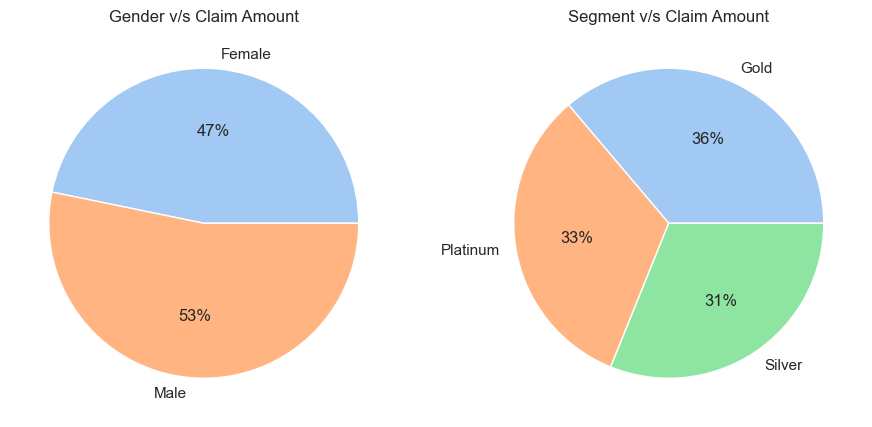

In [32]:
# Q11) Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount
#      as a percentage on the pie chart.

plt.figure(figsize = (11,6))
plt.subplot(1,2,1)
plt.title('Gender v/s Claim Amount')
plt.pie(data = insu_df.loc[:,['gender','claim_amount']].groupby(by = 'gender').sum().reset_index(), x = 'claim_amount',
        labels = 'gender', colors = sns.color_palette('pastel'), autopct = '%.0f%%' )

plt.subplot(1,2,2)
plt.title('Segment v/s Claim Amount')
plt.pie(data = insu_df.loc[:,['Segment','claim_amount']].groupby(by = 'Segment').sum().reset_index(), x = 'claim_amount',
        labels = 'Segment', colors = sns.color_palette('pastel'), autopct = '%.0f%%' )
plt.show()

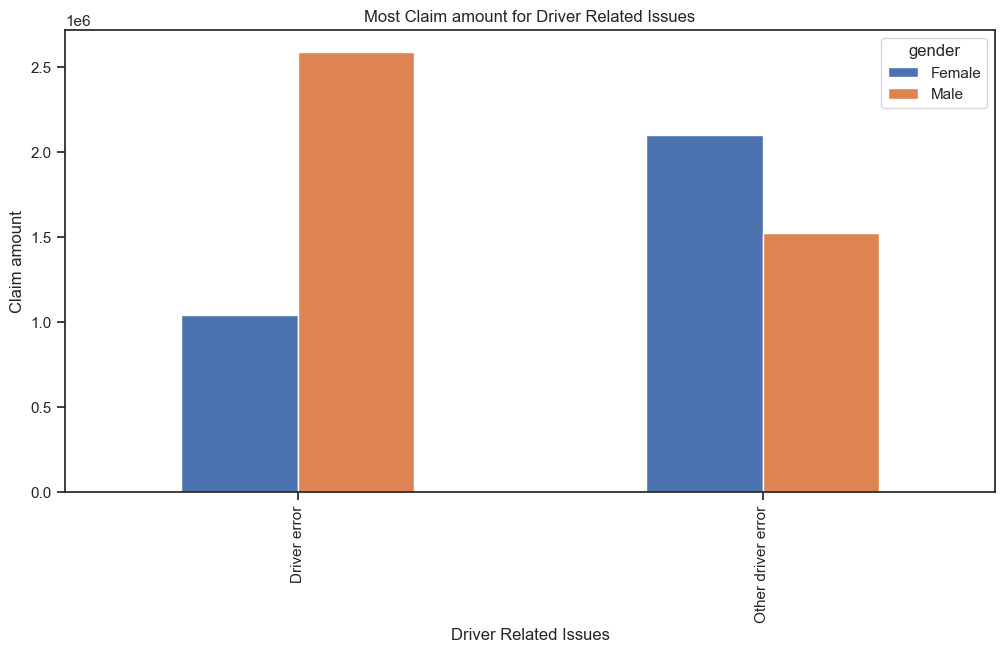

In [33]:
# Q12) Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can
#      be compared using a bar chart.

insu_df.loc[(insu_df.incident_cause.isin(['Driver error', 'Other driver error'])),
            :].pivot_table(index = 'incident_cause', columns = 'gender',
                            values = 'claim_amount',
                           aggfunc = 'sum').plot(kind = 'bar', figsize = (12,6), title = 'Most Claim amount for Driver Related Issues',
                                                 xlabel = 'Driver Related Issues', ylabel = 'Claim amount')
            
plt.show()

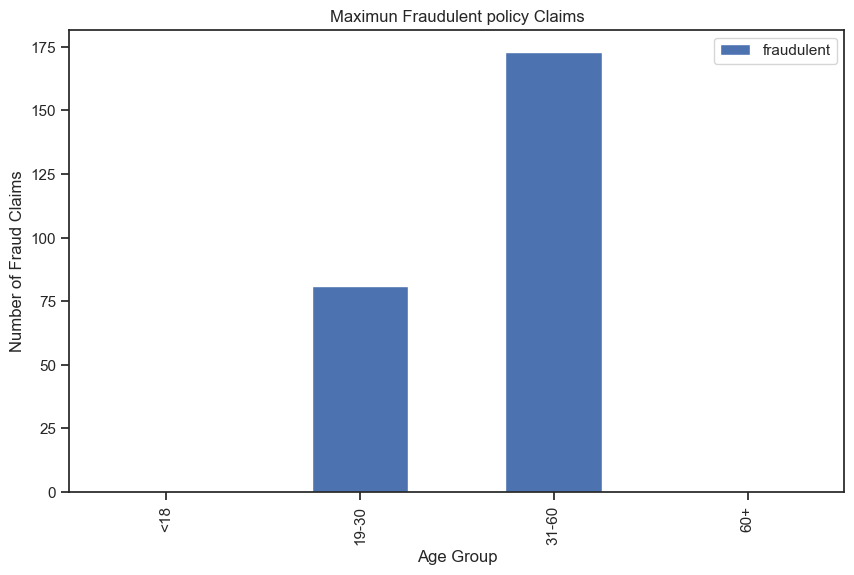

In [34]:
# Q13) Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

insu_df.loc[(insu_df.fraudulent == 'Yes'),
            ['Age_Group', 'fraudulent']].groupby(by = 'Age_Group').count().plot(kind = 'bar', figsize = (10,6),
                                                                                title = 'Maximun Fraudulent policy Claims',
                                                                                xlabel = 'Age Group', ylabel = 'Number of Fraud Claims')
plt.show()

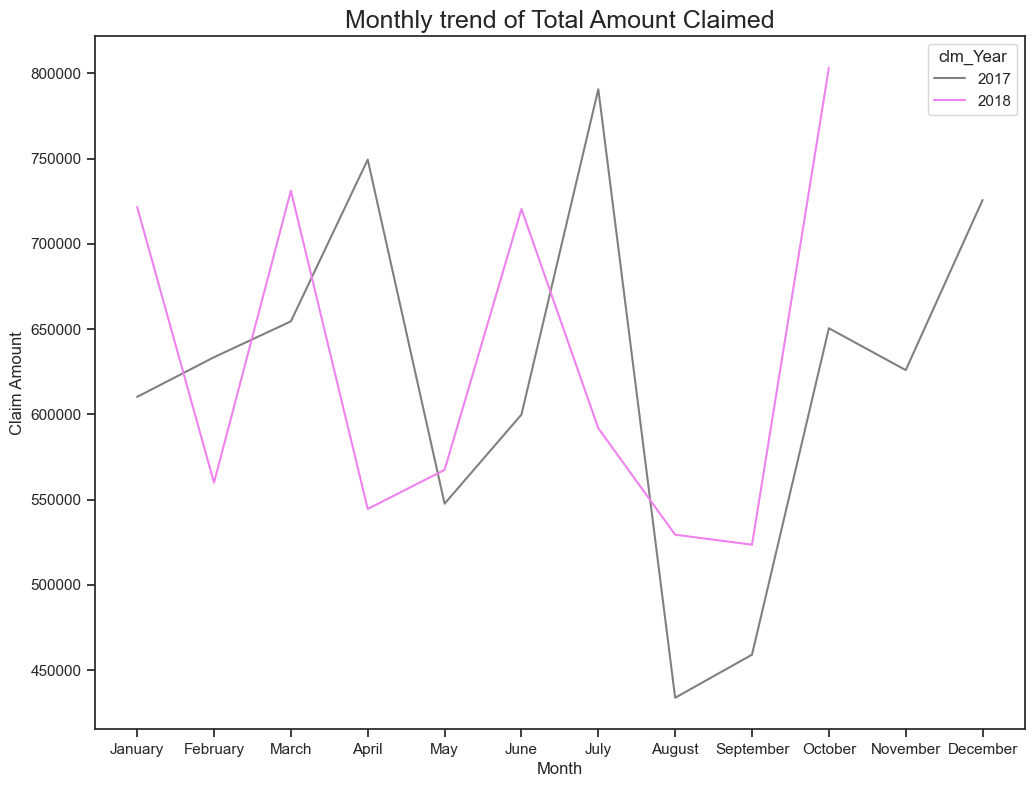

In [35]:
# Q14) Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis,
#      the month is in a chronological order not alphabetical order. 

# data prep
insu_df['clm_Year'] = insu_df.claim_date.dt.year
insu_df['clm_Month'] = insu_df.claim_date.dt.month

year_agg = insu_df.loc[:,['clm_Year', 'clm_Month',
                           'claim_amount']].groupby(by = ['clm_Year', 'clm_Month']).sum().round(2).reset_index()
year_agg.clm_Month = pd.to_datetime(year_agg.clm_Month, format = '%m')
year_agg.clm_Month = year_agg.clm_Month.dt.month_name()

# data plot
plt.figure(figsize = (12,9))
sns.lineplot(data = year_agg, x = 'clm_Month', y = 'claim_amount', hue = 'clm_Year', palette = ['grey', 'violet'])
plt.title('Monthly trend of Total Amount Claimed', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Claim Amount')
plt.show()

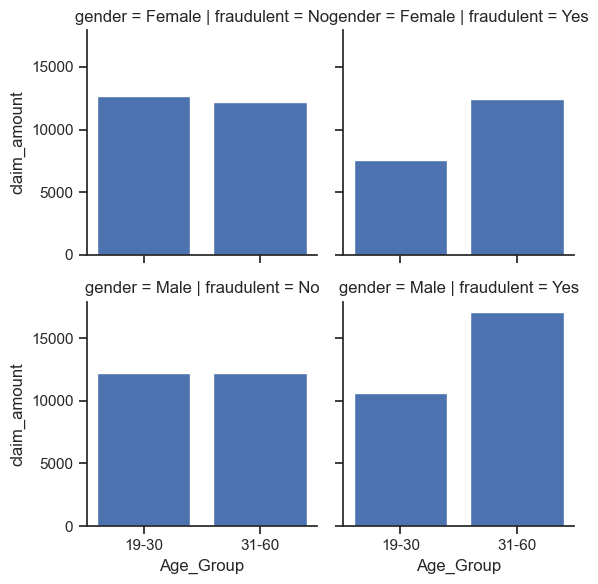

In [36]:
# Q15) What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar
#      chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

# summary prep
summ_tab = insu_df.loc[:,['Age_Group', 'gender',
                          'claim_amount',
                          'fraudulent']].groupby(by =['Age_Group', 'gender', 'fraudulent']).mean().reset_index()

# data plot
g = sns.FacetGrid(summ_tab, col = 'fraudulent', row = 'gender')
g.map(plt.bar, 'Age_Group', 'claim_amount')
plt.show()

## Hypothesis Testing

#### Q16) Is there any similarity in the amount claimed by males and females?

 **Problem Statement:** Comparison of amount claimed by males and females
 We compare the mean of amount claimed by males and the mean of amount claimed by females to check for similarity.
 
 **Hypothesis Statement:** The average claim amount of the genders are different from each other.

1) Setting up of null hypothesis:
 *Ho :* The samples show that claim amount are same for both genders i.e **Umales = Ufemales**

 2) Setting up of alternate hypothesis:
 *Ha :* The samples show that claim amount are different for both genders i.e **Umales <> Ufemales**

 3) Setting up of confidence intervals:
 CI : **95%, p = 0.05**

In [37]:
# Test Preparation:
sam_m = insu_df.loc[(insu_df.gender == 'Male'), 'claim_amount']
sam_fm = insu_df.loc[(insu_df.gender == 'Female'), 'claim_amount']

# print the means:
print('male claim amount mean:', sam_m.mean())
print('female claim amount mean:', sam_fm.mean())

male claim amount mean: 12793.768656195463
female claim amount mean: 12064.80041198502


In [38]:
# Performing independent t test:
stats.ttest_ind(sam_m, sam_fm)

Ttest_indResult(statistic=0.9104294598170931, pvalue=0.36279461659966594)

#### Result of the Test:

- The obtained pvalue for the test is greater than the threshold significance.
- Hence we fail to reject the null hypothesis


#### Business Conclusion:

It is found that with 95% confidence, we can conclude that insurance amount claimed by both genders is similar.

#### Q17)  Is there any relationship between age category and segment ?

**Problem Statement:** To determine a relationship between to categories (Age_Group and Segment).
    
**Hypothesis Statement:** There is some associativity between Age Group and Segments used.
    
1) Setting up of null hypothesis: *Ho:* The 2 variables are **independent** of each other.
2) Setting up of alternate hypothesis: *Ha:* The 2 variables are **associated** with each other.
3) Setting up of confidence intervals: CI: 95% p = 0.05

In [39]:
# Test Preparation: Preparing the observation table:

obvs_tb = pd.crosstab(insu_df.Age_Group, insu_df.Segment)
obvs_tb

Segment,Gold,Platinum,Silver
Age_Group,,,
19-30,126,119,108
31-60,265,246,243


In [40]:
# Performing the Test:
# Chi-Square test (Contingency):
stats.chi2_contingency(obvs_tb)

Chi2ContingencyResult(statistic=0.30857494866780927, pvalue=0.8570256127279676, dof=2, expected_freq=array([[124.68202349, 116.39114724, 111.92682927],
       [266.31797651, 248.60885276, 239.07317073]]))

#### Result of the Test:

- The obtained p-value for the test is greater than the threshold significance.
- Hence we fail to reject the null Hypothesis.

#### Business Conclusion:

From the test result, we can conclude with 95% confidence that the 2 variables **'Age Group'** and **'Segment'** are independent of each other.

#### Q18) The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

**Problem Statement:** To check if the current year has shown significant rise in claim amounts as compared to last year, which resulted in an average of $10,000.

**Hypothesis Statement:** The current year's fiscal average is greater than $10,000.

1) Setting up of null hypothesis: *Ho:* The current year's fiscal average is less than or equal to 10,000. i.e **u <= 10,000**.
2) Setting up of alternate hypothesis: *Ha:* The current year's fiscal average is greater than 10,000. i.e **u > 10,000**.
3) Setting up of confidence intervals: CI: 95% , p = 0.05

In [41]:
# Test Preparation:

ob_mean = 10000
sam_1 = insu_df.loc[:, 'claim_amount']

# display the means
print('popmean: ', ob_mean, '| sample mean: ', sam_1.mean() )

popmean:  10000 | sample mean:  12442.125438121047


In [42]:
# Performing the Test:
# 1 sample t-test:

stats.ttest_1samp( a = sam_1, popmean = ob_mean )

TtestResult(statistic=6.104343170363203, pvalue=1.4263283113451443e-09, df=1106)

#### Result of Test:

- The obtained p-value for the test is less than the threshold significance.
- We reject the null hypothesis with a confidence of 95% and an error of 5%.

#### Business Conclusion:

From the test result, we conclude that the current year has shown significant rise in claim amounts as compared to 2016-17 fiscal average.

#### 19) Is there any difference between age groups and insurance claims?

**Problem Statement:** To determine which age group is making more insurance claims.

**Hypothesis Statement:** The insurance claimed by the two age groups is different from each other.
    
 1) Setting up of null hypothesis: *Ho:* There is no difference in the amount claimed by the 2 age groups. Uagp_a = Uagp_b
 2) Setting up of alternate hypothesis: *Ha:* There is a difference in the amount claimed by the 2 age groups. Uagp_a <> Uagp_b
 3) Setting up of confidence intervals: CI: 95%, p = 0.05

In [48]:
# Data Preparation:

agp_a = insu_df.loc[(insu_df.Age_Group == '19-30'), 'claim_amount']
agp_b = insu_df.loc[(insu_df.Age_Group == '31-60'), 'claim_amount']

print('Mean of Age Group 19-30:', agp_a.mean(), '| Mean of Age Group 31-60:', agp_b.mean())

Mean of Age Group 19-30: 11721.602322946175 | Mean of Age Group 31-60: 12779.452572944298


In [49]:
# Performing the Test:
# Performing the independent sample t-test:

stats.ttest_ind(agp_a, agp_b)

Ttest_indResult(statistic=-1.2326009697851468, pvalue=0.21798685678130503)

#### Result of Test:
- The obtained p-value is greater than the threshold p-value.
- Hence we fail to reject the null hypothesis.

#### Business Conclusion:

There seems to be marginally greater amount of insurance claimed by Age Group 31-60 but seems to 
have no or minute difference in terms of population.

#### Q20) Is there any relationship between total number of policy claims and the claimed amount?

**Problem Statement:** To determine the existance of a relationship between the number of policy claims and the claim amount?
    
**Hypothesis Statement:** The claim amount is dependent on the number of policy claims.
    
1) Setting up of null hypothesis: *Ho:* There is no association between the 2 variables i.e independent.
2) Setting up of alternate hypothesis: *Ha:* There is an association between the 2 variables i.e dependent.
3) Setting up of Confidence Intervals: CI: 95%, p = 0.05

In [50]:
insu_df.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'Age', 'Age_Group', 'clm_Year',
       'clm_Month'],
      dtype='object')

In [51]:
# Correlation Test:
insu_df.loc[:,['total_policy_claims', 'claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.019492
claim_amount,-0.019492,1.000000


In [52]:
# Performing Pearson's Test:

stats.pearsonr(insu_df.total_policy_claims, insu_df.claim_amount)

PearsonRResult(statistic=-0.01949234736019829, pvalue=0.517068633688039)

#### Result of Test:

- The obtained p-value for the test is greater than the threshold significance.
- Hence we fail to reject the null Hypothesis.

#### Business Conclusion: 

From the findings we infer that there is no relation between the amount claimed and the total number of policy claims with a confidence of 95%.